# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Loading-CfA-SN-lightcurves" data-toc-modified-id="Loading-CfA-SN-lightcurves-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading CfA SN lightcurves</a></div><div class="lev2 toc-item"><a href="#start-here" data-toc-modified-id="start-here-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>start here</a></div><div class="lev1 toc-item"><a href="#Finally-Gaussian-Processes" data-toc-modified-id="Finally-Gaussian-Processes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Finally Gaussian Processes</a></div><div class="lev2 toc-item"><a href="#GP-in-natural-time-space-(hp-=-100)" data-toc-modified-id="GP-in-natural-time-space-(hp-=-100)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>GP in natural time space (hp = 100)</a></div><div class="lev2 toc-item"><a href="#GP-in-log-space-(hp-=-1)" data-toc-modified-id="GP-in-log-space-(hp-=-1)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>GP in log space (hp = 1)</a></div><div class="lev1 toc-item"><a href="#Increasing-the-data-uncertainty-(hp-=-0.1)" data-toc-modified-id="Increasing-the-data-uncertainty-(hp-=-0.1)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Increasing the data uncertainty (hp = 0.1)</a></div><div class="lev2 toc-item"><a href="#Optimizing-the-hyper-parameters" data-toc-modified-id="Optimizing-the-hyper-parameters-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Optimizing the hyper parameters</a></div><div class="lev1 toc-item"><a href="#Subracting-the-mean-and-fitting-GP-to-residuals-only" data-toc-modified-id="Subracting-the-mean-and-fitting-GP-to-residuals-only-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Subracting the mean and fitting GP to residuals only</a></div><div class="lev2 toc-item"><a href="#GP-in-natural-space---mean-removed-(hp-=-100)" data-toc-modified-id="GP-in-natural-space---mean-removed-(hp-=-100)-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>GP in natural space - mean removed (hp = 100)</a></div><div class="lev2 toc-item"><a href="#GP-in-log-space---mean-removed-(hp=0.01)" data-toc-modified-id="GP-in-log-space---mean-removed-(hp=0.01)-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>GP in log space - mean removed (hp=0.01)</a></div><div class="lev1 toc-item"><a href="#meanwhile,-arctan-does-not-have-the-right-properties" data-toc-modified-id="meanwhile,-arctan-does-not-have-the-right-properties-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>meanwhile, arctan does not have the right properties</a></div>

In [1]:
import pylab as pl
import numpy as np
import george
from george import kernels
from george.kernels import ExpSquaredKernel
from george.kernels import ExpSquaredKernel
#
#
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# a whole bunch of imports...I'm being annoyingly liberal here
import glob 
import inspect
import optparse
import time
import copy
import os
import pylab as pl
import numpy as np
import scipy
import json
import sys
import pickle as pkl

import scipy as sp
import numpy as np
from scipy import optimize
from scipy.interpolate import interp1d
from scipy import stats as spstats 
from scipy import integrate

from scipy.interpolate import InterpolatedUnivariateSpline

from scipy.interpolate import UnivariateSpline,splrep, splev
import scipy.optimize as op
from scipy import interpolate

import multiprocessing as mpc

import json
import os
import pandas as pd

s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

cmd_folder = os.path.realpath(os.getenv("SESNCFAlib"))

if cmd_folder not in sys.path:
     sys.path.insert(0, cmd_folder)

import snclasses as snstuff
import templutils as templutils
import utils as snutils
import fitutils as fitutils
import myastrotools as myas
import matplotlib as mpl

mpl.use('agg')

import pylab as pl
from pylab import rc
import plotutils as plotutils
from scipy.interpolate import interp1d
import templutils as tpl

pl.rcParams['figure.figsize']=(10,10)

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Loading CfA SN lightcurves

In [3]:
#setting parameters for lcv reader
#use literature data (if False only CfA data)
LIT=True
#use NIR data too
FNIR=True
#uncomment for all lcvs to be read in
#allsne = pd.read_csv(os.getenv("SESNCFAlib") + "/SESNessentials.csv")['SNname'].values

In [4]:
allsne = ['93J']

#set up SESNCfalib stuff
su = templutils.setupvars()
nbands = len(su.bands)

errorbarInflate = {"93J":30, 
                   "05mf":1}
        

## start here

In [5]:
#reload from here if you make changes to snclass
reload(snstuff)

<module 'snclasses' from '/Users/fbianco/science/Dropbox/strippedcfaSN/SESNCFAlib/snclasses.pyc'>

In [6]:
sn = allsne[0]
print sn
# read and set up SN and look for photometry files
thissn = snstuff.mysn(sn, addlit=True)
if len(thissn.optfiles) + len(thissn.fnir) == 0:
    print ("bad sn")
# read metadata for SN
thissn.readinfofileall(verbose=False, earliest=False, loose=True)
thissn.printsn()

93J
name, shortname sn1993J 93J
SN name short: 93J



#######Optical & UV#######

No CfA optical files
all optical files: ['/Users/fbianco/science/Dropbox//strippedcfaSN//literaturedata/phot/slc.sn93J.f']


#######NIR#######

No CfA NIR files
reading small file
Vmax 2449095.23



##############  THIS SUPERNOVA IS: ###############

name:  sn1993J
type:  IIb
Vmax date: 2449095.230
Vmax  mag: 0.00
filters:  {'m2': 0, 'B': 0, 'I': 0, 'H': 0, 'K': 0, 'J': 0, 'i': 0, 'R': 0, 'u': 0, 'w2': 0, 'w1': 0, 'V': 0, 'U': 0, 'r': 0}

##################################################





In [7]:
# check SN is ok and load data
if thissn.Vmax is None or thissn.Vmax == 0 or np.isnan(thissn.Vmax):
    print ("bad sn")
print (" starting loading ")    
lc, flux, dflux, snname = thissn.loadsn2(verbose=True)
thissn.setphot()
thissn.getphot()
thissn.setphase()
thissn.sortlc()
thissn.printsn()

 starting loading 
optical files ['/Users/fbianco/science/Dropbox//strippedcfaSN//literaturedata/phot/slc.sn93J.f']
lightcurve type CfA4  /Users/fbianco/science/Dropbox//strippedcfaSN//literaturedata/phot/slc.sn93J.f
loading slc.sn93J.f
('Ul', 49080.19921875, 11.149999618530273, 0.009999999776482582, 11.149999618530273) [ ('Ul', 49080.19921875, 11.149999618530273, 0.009999999776482582, 11.149999618530273)
 ('Ul', 49084.19921875, 11.829999923706055, 0.009999999776482582, 11.829999923706055)
 ('Ul', 49084.19921875, 11.720000267028809, 0.009999999776482582, 11.720000267028809)
 ...,
 ('Il', 49147.19921875, 11.789999961853027, 0.009999999776482582, 11.789999961853027)
 ('Il', 49165.19921875, 12.15999984741211, 0.009999999776482582, 12.15999984741211)
 ('Il', 49180.19921875, 12.489999771118164, 0.009999999776482582, 12.489999771118164)] [ 1733684.        926766.0625   1025580.5625  ...,   961545.6875
   683864.625     504626.65625] [ 3011.7175293   1609.95751953  1781.6159668  ...,  1670.37

In [8]:
#check that it is k
if np.array([n for n in thissn.filters.itervalues()]).sum() == 0:
        print ("bad sn")



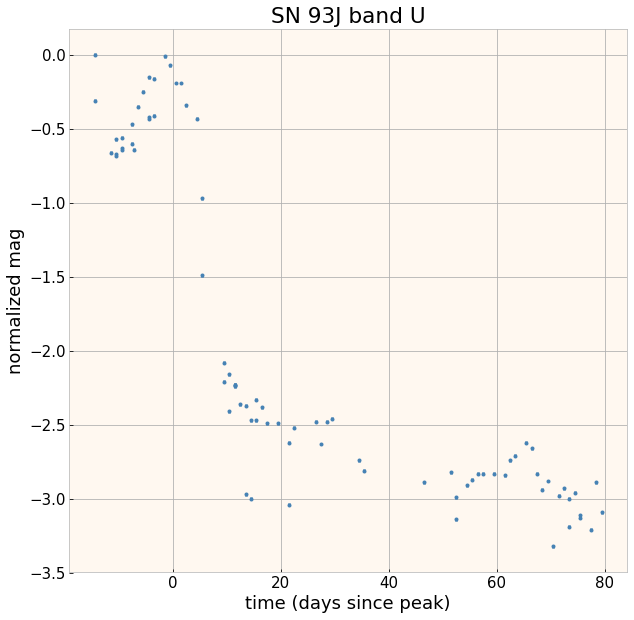

In [9]:
b = 'U'
xmin = thissn.photometry[b]['mjd'].min()
x = thissn.photometry[b]['mjd'] - thissn.Vmax + 2400000.5
y = thissn.photometry[b]['mag'] 
y = y.min() - y
yerr = thissn.photometry[b]['dmag']
pl.errorbar(x, y, yerr, fmt='.')
pl.title("SN %s band %s"%(sn, b))
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")


# Finally Gaussian Processes

## GP in natural time space (hp = 100)

('hyper parameters: ', ConstantKernel(0.316227766017, ndim=1) * ExpSquaredKernel(100.0, ndim=1))


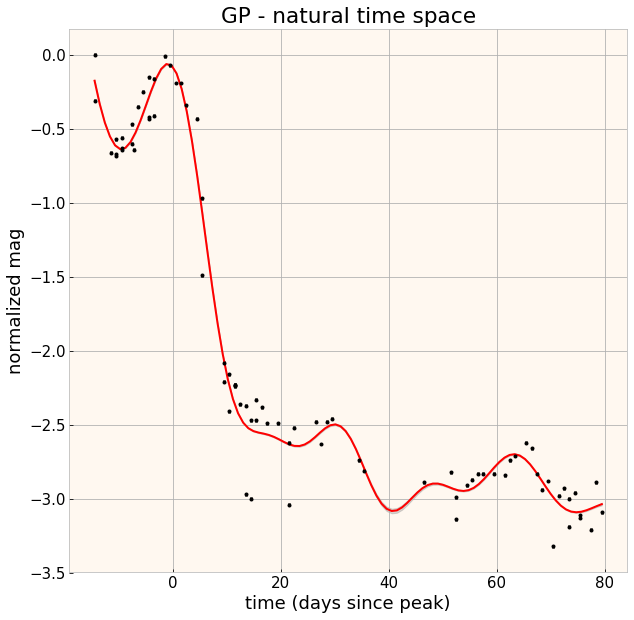

In [10]:
# Set up the Gaussian process.
kernel = kernels.Product(kernels.ConstantKernel(sqrt(1e-1)),
                         kernels.ExpSquaredKernel(100))
gp = george.GP(kernel)
print ("hyper parameters: ",gp.kernel)

# Pre-compute the factorization of the matrix.

t = np.linspace(x.min(), x.max(), 100)
gp.compute(x, yerr)
mu, cov = gp.predict(y, t)
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr, fmt='k.')

pl.plot(t,mu, 'r', lw=2)
pl.fill_between(t, mu-std, mu+std, color='grey', alpha=0.3)
pl.title("GP - natural time space")
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")


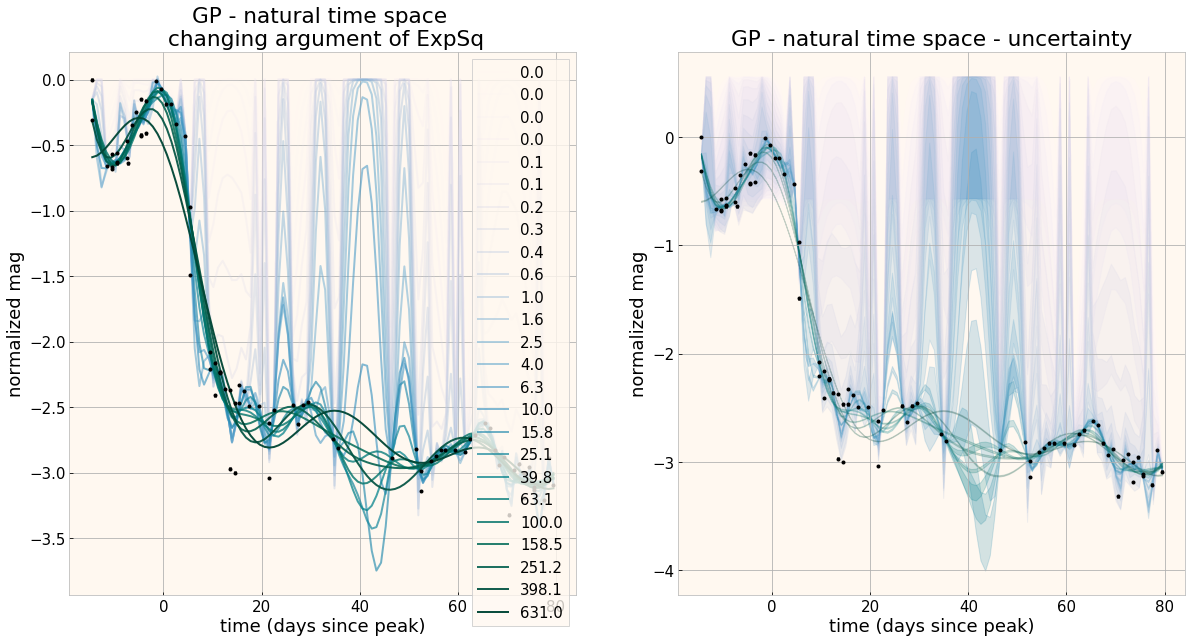

In [11]:
hps = np.arange(-2, 3, 0.2)
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.errorbar(x, y, yerr=yerr, fmt='k.')
ax2.errorbar(x, y, yerr=yerr, fmt='k.')

color=iter(pl.cm.PuBuGn(np.linspace(0,1,hps.shape[0])))
for i,k in enumerate(hps):
    c=next(color)
    kernel = kernels.Product(kernels.ConstantKernel(sqrt(1e-1)),
                             kernels.ExpSquaredKernel(10**(k)))
    gp = george.GP(kernel)
    try:
        gp.compute(x, yerr)
    except ValueError:
        print (" no solution for k", k)
        continue
    mu, cov = gp.predict(y, t)
    std = np.sqrt(np.diag(cov))
    ax1.plot(t, mu, lw=2, color=c, alpha=float(i+1)/(hps.shape[0]+1), label="%.1f"%10**k)
    #print (ax._get_lines.color_cycle[-1])
    ax2.fill_between(t, mu-std, mu+std, color=c, alpha=0.2)
ax1.set_title("GP - natural time space \n changing argument of ExpSq")
ax2.set_title("GP - natural time space - uncertainty")
ax1.set_ylabel("normalized mag")
ax2.set_ylabel("normalized mag")
ax1.legend()
ax1.set_xlabel("time (days since peak)")
xl = ax2.set_xlabel("time (days since peak)")


## GP in log space (hp = 1)

('hyper parameters: ', ConstantKernel(0.316227766017, ndim=1) * ExpSquaredKernel(1.0, ndim=1))


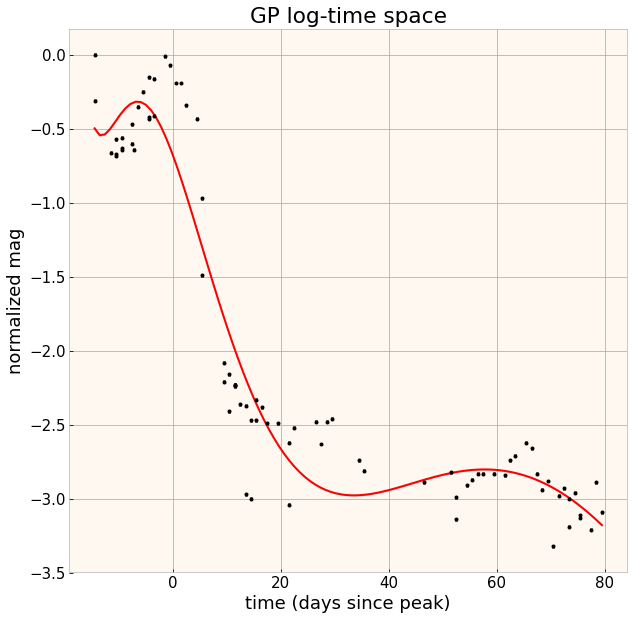

In [12]:
# Set up the Gaussian process.
kernel = kernels.Product(kernels.ConstantKernel(sqrt(1e-1)),
                         kernels.ExpSquaredKernel(1))
gp = george.GP(kernel)
print ("hyper parameters: ",gp.kernel)

# Pre-compute the factorization of the matrix.


gp.compute(np.log(x+30), yerr)
mu, cov = gp.predict(y, np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr, fmt='k.')

pl.title("GP log-time space")
pl.plot(t , mu, 'r', lw=2)
pl.fill_between(t, mu-std, mu+std, color='grey', alpha=0.3)
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")


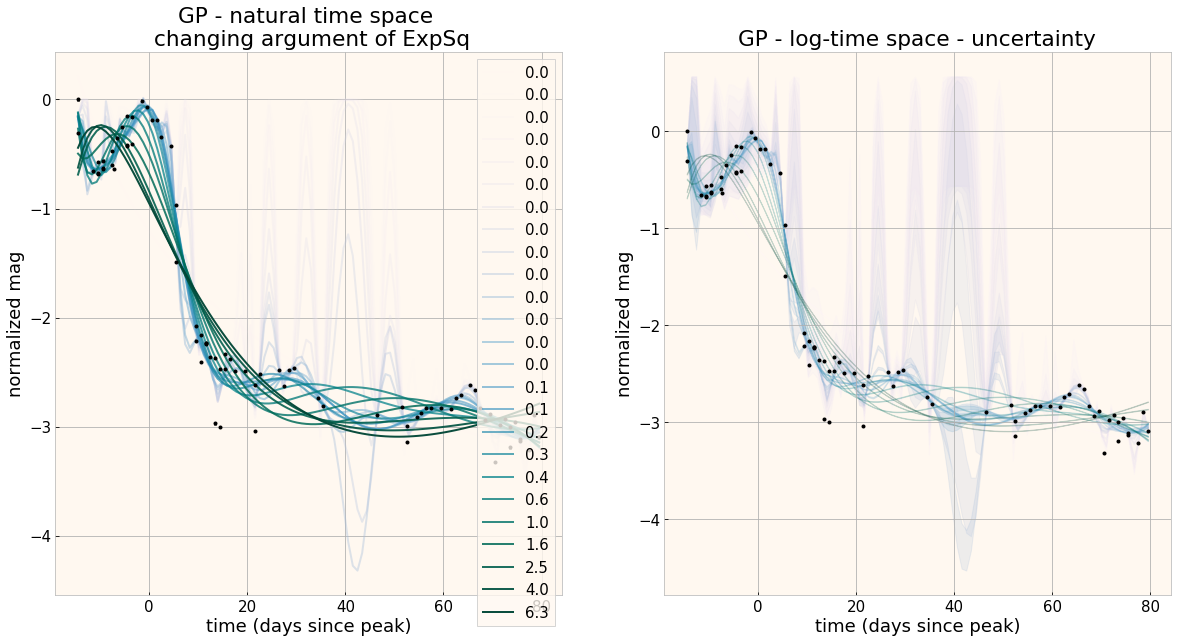

In [16]:
hps = np.arange(-4, 1, 0.2)
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.errorbar(x, y, yerr=yerr, fmt='k.')
ax2.errorbar(x, y, yerr=yerr, fmt='k.')

color=iter(pl.cm.PuBuGn(np.linspace(0,1,hps.shape[0])))

for i,k in enumerate(hps):
    c=next(color)
    gp = george.GP(kernel)
    kernel = kernels.Product(kernels.ConstantKernel(sqrt(1e-1)),
                             kernels.ExpSquaredKernel(10**(k)))
    try:
        gp.compute(np.log(x+30), yerr)
    except ValueError:
        print (" no solution for k", k)
        continue
               
    mu, cov = gp.predict(y, np.log(t+30))
    std = np.sqrt(np.diag(cov))
    ax1.plot(t, mu, lw=2, color=c, alpha=float(i+1)/(hps.shape[0]+1), label="%.1f"%10**k)
    #print (ax._get_lines.color_cycle[-1])
    ax2.fill_between(t, mu-std, mu+std, color=c, alpha=0.2)
ax1.set_title("GP - natural time space \n changing argument of ExpSq")
ax2.set_title("GP - log-time space - uncertainty")
ax1.set_ylabel("normalized mag")
ax2.set_ylabel("normalized mag")
ax1.legend()
ax1.set_xlabel("time (days since peak)")
xl = ax2.set_xlabel("time (days since peak)")


# Increasing the data uncertainty (hp = 0.1)

('hyper parameters: ', ConstantKernel(0.316227766017, ndim=1) * ExpSquaredKernel(0.1, ndim=1))


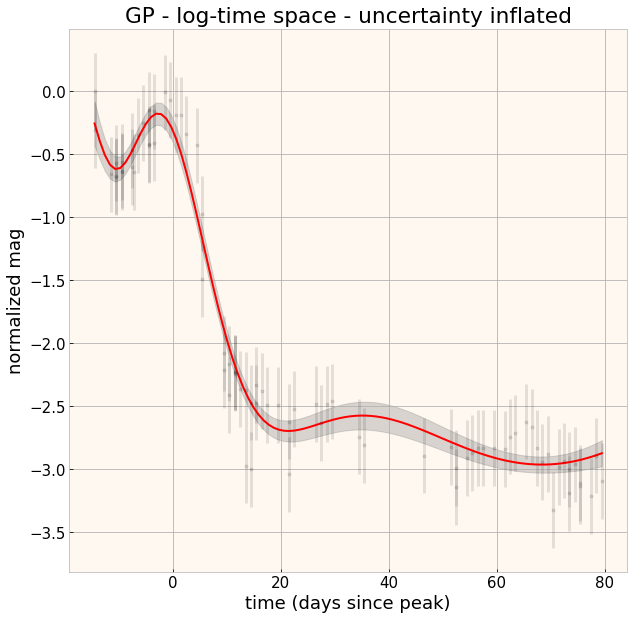

In [17]:
# Set up the Gaussian process.
kernel = kernels.Product(kernels.ConstantKernel(sqrt(1e-1)),
                         kernels.ExpSquaredKernel(0.1))

gp = george.GP(kernel)
print ("hyper parameters: ",gp.kernel)

# Pre-compute the factorization of the matrix.

gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y, np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)

pl.title("GP - log-time space - uncertainty inflated")
pl.plot(t , mu, 'r', lw=2)
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")

pl.fill_between(t, mu-std, mu+std, color='grey', alpha=0.3)

## Optimizing the hyper parameters

In [18]:
t = np.linspace(x.min(), x.max(), 100)
kernel = kernels.Product(kernels.ConstantKernel(sqrt(1e-1)),
                         kernels.ExpSquaredKernel(0.1))

gp = george.GP(kernel)

def der(xy):
    x,y  = xy[0],xy[1]
    return [(y[1]-y[:-1] ) / np.diff(y)[0],  x ] 

def nll(p, y, x, gp):
    # Update the kernel parameters and compute the likelihood.
    gp.kernel[:] = p
    ll = gp.lnlikelihood(y, quiet=True)

    return -ll if np.isfinite(ll) else 1e25

def grad_nll(p, y, x, gp):
    # Update the kernel parameters and compute the likelihood.
    gp.kernel[:] = p
    smoothness = np.nansum(np.abs(der(der([gp.predict(y,x)[0], x]))),axis=1)[0]
    #print ("here", smoothness)
    smoothness = smoothness if np.isfinite(smoothness) and ~np.isnan(smoothness) else 1e25
    return -gp.grad_lnlikelihood(y, quiet=True) * (smoothness)**2

p0 = gp.kernel.vector
print ("hyper parameters", p0)

('hyper parameters', array([-1.15129255, -2.30258509]))


In [19]:
gp.compute(x, yerr)

results = op.minimize(nll, p0, jac=grad_nll, args=(y, t, gp))
    #    # Update the kernel and print the final log-likelihood.
gp.kernel[:] = results.x
print ("hyper parameters: ",gp.kernel)
print("loglikelihood", gp.lnlikelihood(y))


('hyper parameters: ', ConstantKernel(0.316227766017, ndim=1) * ExpSquaredKernel(0.1, ndim=1))
('loglikelihood', -4329.0231542660476)


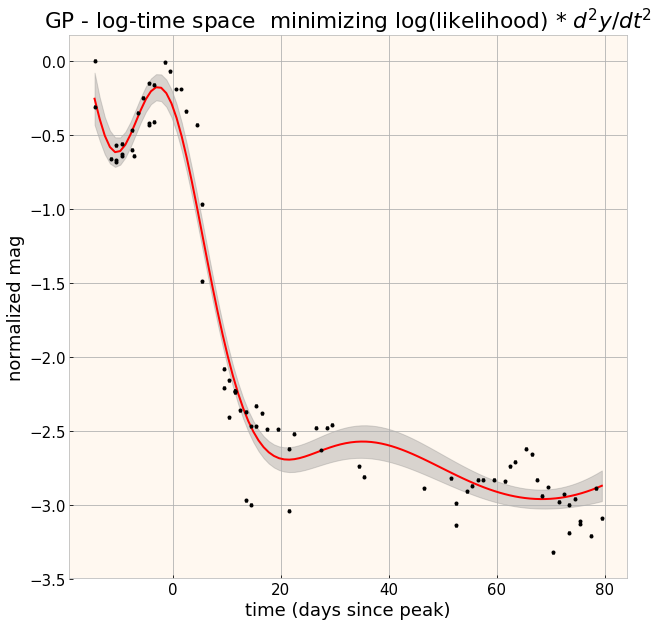

In [20]:
# Set up the Gaussian process.

# Pre-compute the factorization of the matrix.

gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y, np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr, fmt='k.')

pl.title(r"GP - log-time space  minimizing $\log(\mathrm{likelihood})$ * $d^2y/dt^2$")
ax2.set_title("GP - log-time space - uncertainty")
ax1.set_ylabel("normalized mag")
ax2.set_ylabel("normalized mag")
pl.plot(t , mu, 'r', lw=2)
pl.fill_between(t, mu-std, mu+std, color='grey', alpha=0.3)
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")


# Subracting the mean and fitting GP to residuals only

In [21]:
#spl = InterpolatedUnivariateSpline(templ.phs, ysmooth)
templatePkl = "UberTemplate_%s.pkl" % \
                   (b + 'p' if b in ['u', 'r', 'i']
                                            else b)
tmpl = pkl.load(open(templatePkl, "rb"))
tmpl['mu'] = -tmpl['mu']
print ("Template for the current band", templatePkl)
tmpl


('Template for the current band', 'UberTemplate_U.pkl')


{'mu': array([-1.00046384, -1.04571629, -1.04571593, ..., -3.59228897,
        -3.59228921, -3.59228897]),
 'phs': array([-22.08333333, -22.04166667, -22.        , ...,  86.75      ,
         86.79166667,  86.83333333]),
 'spl': <scipy.interpolate.fitpack2.InterpolatedUnivariateSpline at 0x1117ee650>,
 'std': array([ 0.18579639,  0.21083879,  0.21083879, ...,  0.24169515,
         0.24169515,  0.24169515])}

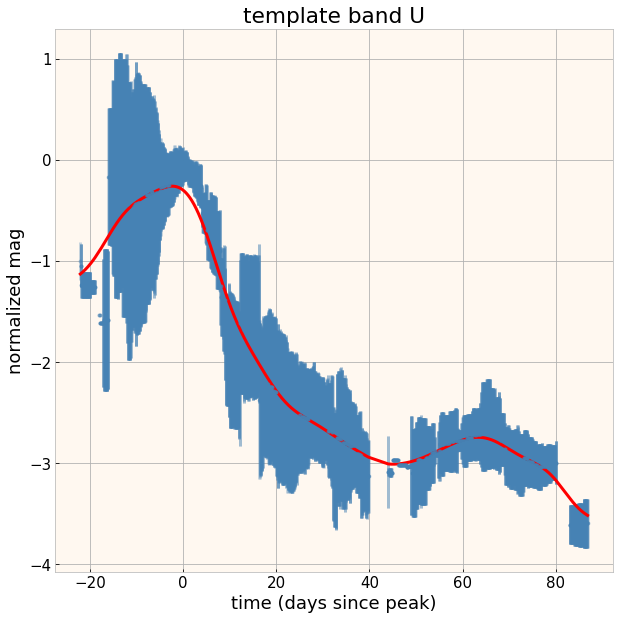

In [22]:
tmpl['musmooth'] = -tmpl['spl'](tmpl['phs'])
ax = pl.figure().add_subplot(111)
ax.errorbar(tmpl['phs'], tmpl['mu'], yerr=tmpl['std'], fmt='.', alpha=0.3)
ax.plot(tmpl['phs'], tmpl['musmooth'], 'r')
meansmooth = lambda x : -tmpl['spl'](x) + tmpl['spl'](0)  
pl.title("template band %s"%b)
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")


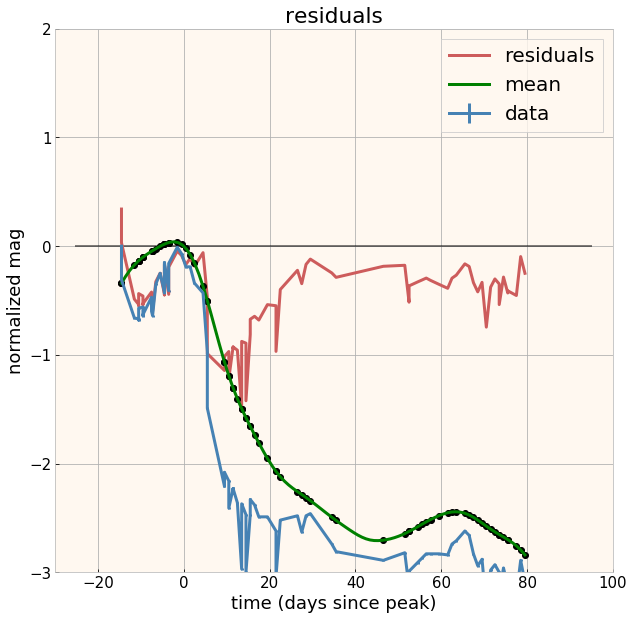

In [23]:
# Set up the Gaussian process.


pl.errorbar(x, y, yerr=yerr, label="data")
pl.plot([-25,95],[0,0], 'k-', alpha=0.5, lw=2)
pl.plot(x, y - meansmooth(x), label="residuals")
pl.plot(x, meansmooth(x), 'ko')
pl.plot(t, meansmooth(t), label="mean")
pl.legend(fontsize=20)
pl.ylim(-3,2)
pl.xlim(-30,100)
pl.title("residuals")
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")

## GP in natural space - mean removed (hp = 100)

('hyper parameters: ', ConstantKernel(0.316227766017, ndim=1) * ExpSquaredKernel(100.0, ndim=1))


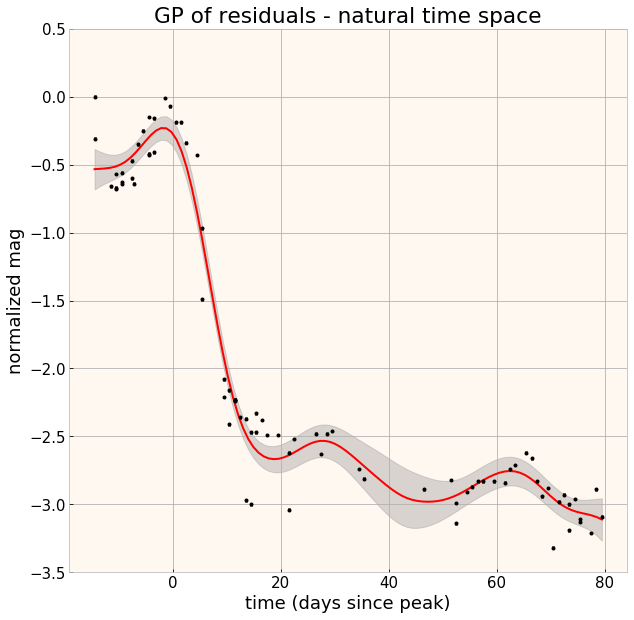

In [24]:
kernel = kernels.Product(kernels.ConstantKernel(sqrt(1e-1)),
                         kernels.ExpSquaredKernel(100))
gp = george.GP(kernel)
print ("hyper parameters: ",gp.kernel)
gp.compute(x, yerr * errorbarInflate[sn])

pl.figure()
mu, cov = gp.predict(y - meansmooth(x), t)
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr, fmt='k.')

pl.plot(t, mu + meansmooth(t), 'r', lw=2)
pl.fill_between(t, 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
pl.ylim(-3.5,0.5)
pl.title("GP of residuals - natural time space")
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")

## GP in log space - mean removed (hp=0.01)

('hyperparameters', ConstantKernel(0.316227766017, ndim=1) * ExpSquaredKernel(0.01, ndim=1))


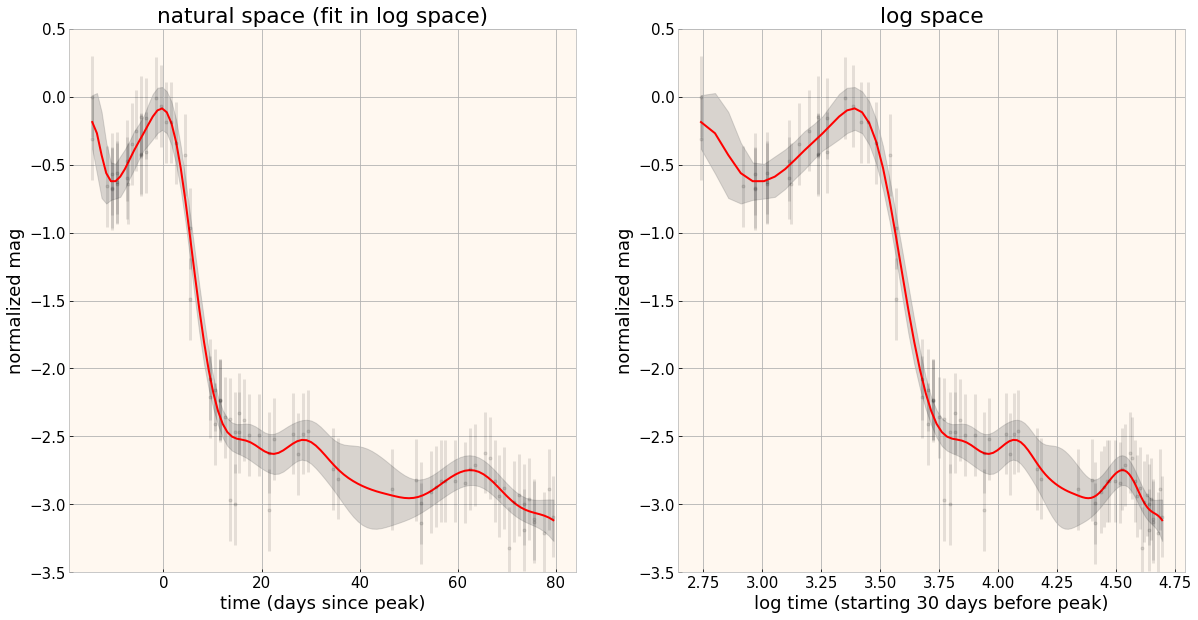

In [26]:
kernel = kernels.Product(kernels.ConstantKernel(sqrt(1e-1)),
                         kernels.ExpSquaredKernel(0.01))
gp = george.GP(kernel)
print ("hyperparameters", gp.kernel)

fig = pl.figure(figsize=(20,10))
fig.add_subplot(1,2,1)
gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y - meansmooth(x), np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)
            
pl.title("natural space (fit in log space)")
pl.plot(t, mu + meansmooth(t), 'r', lw=2)
pl.fill_between(t, 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
pl.ylim(-3.5,0.5)
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")

fig.add_subplot(1,2,2)
gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y - meansmooth(x), np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(np.log(x+30), y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)
            
pl.title("log space")
pl.plot(np.log(t+30), mu + meansmooth(t), 'r', lw=2)
pl.fill_between(np.log(t+30), 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
pl.ylim(-3.5,0.5)
pl.ylabel("normalized mag")
xl = pl.xlabel("log time (starting 30 days before peak)")

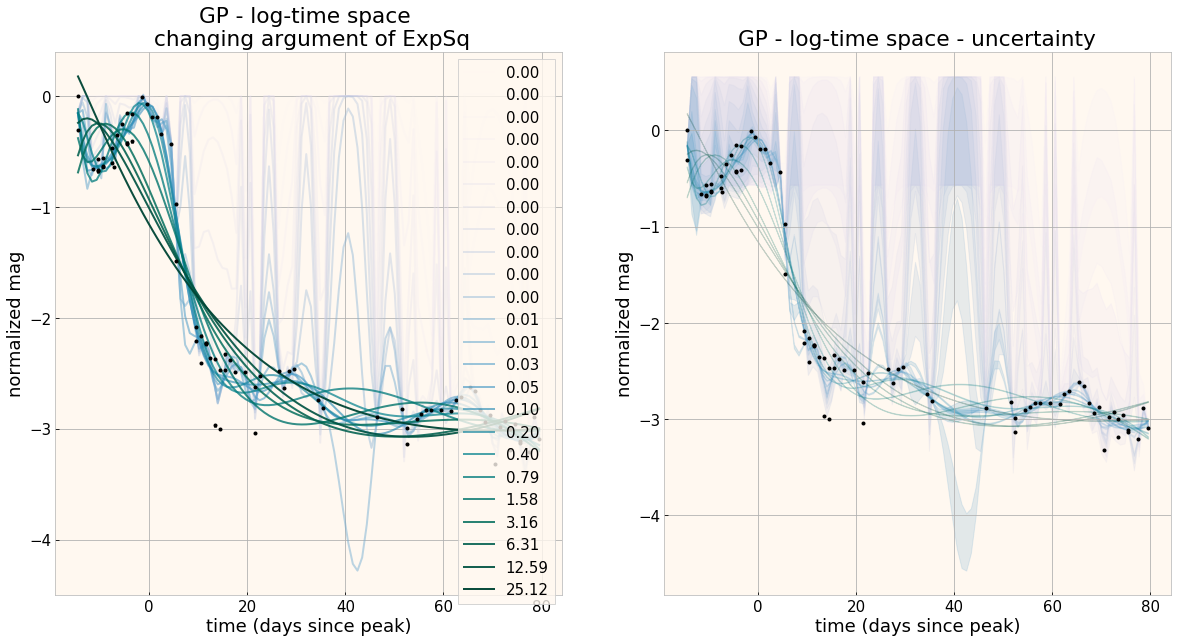

In [27]:
hps = np.arange(-5.5, 1.5, 0.3)
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.errorbar(x, y, yerr=yerr, fmt='k.')
ax2.errorbar(x, y, yerr=yerr, fmt='k.')

color=iter(pl.cm.PuBuGn(np.linspace(0,1,hps.shape[0])))

for i,k in enumerate(hps):
    c=next(color)
    gp = george.GP(kernel)
    kernel = kernels.Product(kernels.ConstantKernel(sqrt(1e-1)),
                             kernels.ExpSquaredKernel(10**(k)))
    try:
        gp.compute(np.log(x+30), yerr)
    except ValueError:
        print (" no solution for k", k)
        continue
               
    mu, cov = gp.predict(y - meansmooth(x), np.log(t+30))
    std = np.sqrt(np.diag(cov))
    mu, cov = gp.predict(y, np.log(t+30))
    std = np.sqrt(np.diag(cov))
    ax1.plot(t, mu, lw=2, color=c, alpha=float(i+1)/(hps.shape[0]+1), label="%.2f"%10**k)
    #print (ax._get_lines.color_cycle[-1])
    ax2.fill_between(t, mu-std, mu+std, color=c, alpha=0.2)
ax1.set_title("GP - log-time space \n changing argument of ExpSq")
ax2.set_title("GP - log-time space - uncertainty")
ax1.set_ylabel("normalized mag")
ax2.set_ylabel("normalized mag")
ax1.legend()
ax1.set_xlabel("time (days since peak)")
xl = ax2.set_xlabel("time (days since peak)")


('hyperparameters', ConstantKernel(0.316227766017, ndim=1) * ExpSquaredKernel(0.1, ndim=1))
('log likelihood', -33.924699764642433)


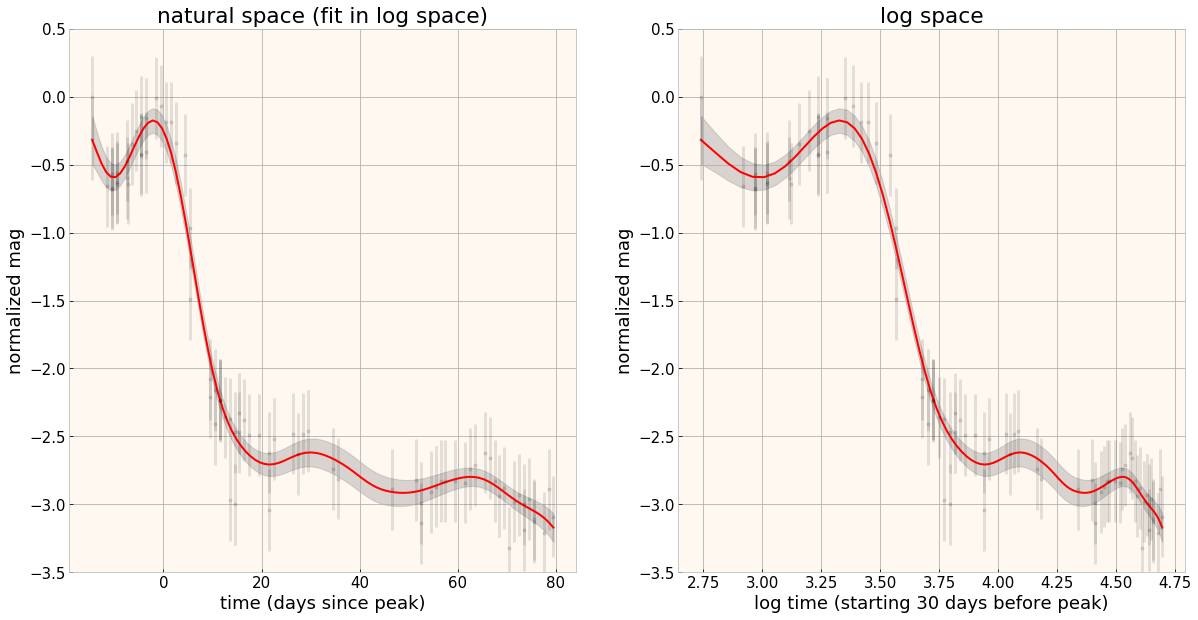

In [28]:
gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
results = op.minimize(nll, p0, jac=grad_nll, args=(y, np.log(t+30), gp))
    #    # Update the kernel and print the final log-likelihood.
gp.kernel[:] = results.x
print ("hyperparameters", gp.kernel)
print("log likelihood", gp.lnlikelihood(y))


fig = pl.figure(figsize=(20,10))
fig.add_subplot(1,2,1)
gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y - meansmooth(x), np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)
            
pl.title("natural space (fit in log space)")
pl.plot(t, mu + meansmooth(t), 'r', lw=2)
pl.fill_between(t, 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
pl.ylim(-3.5,0.5)
pl.ylabel("normalized mag")
xl = pl.xlabel("time (days since peak)")

fig.add_subplot(1,2,2)
gp.compute(np.log(x+30), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y - meansmooth(x), np.log(t+30))
std = np.sqrt(np.diag(cov))
pl.errorbar(np.log(x+30), y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)
            
pl.plot(np.log(t+30), mu + meansmooth(t), 'r', lw=2)
pl.fill_between(np.log(t+30), 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
pl.title("log space")
pl.ylim(-3.5,0.5)
pl.ylabel("normalized mag")
xl = pl.xlabel("log time (starting 30 days before peak)")


# meanwhile, arctan does not have the right properties
since it expands the time near peak but the sharpest changes are expected before peak

('hyperparameters', ConstantKernel(0.380638835673, ndim=1) * ExpSquaredKernel(0.109244172188, ndim=1))
('log likelihood', -24.112546951083466)


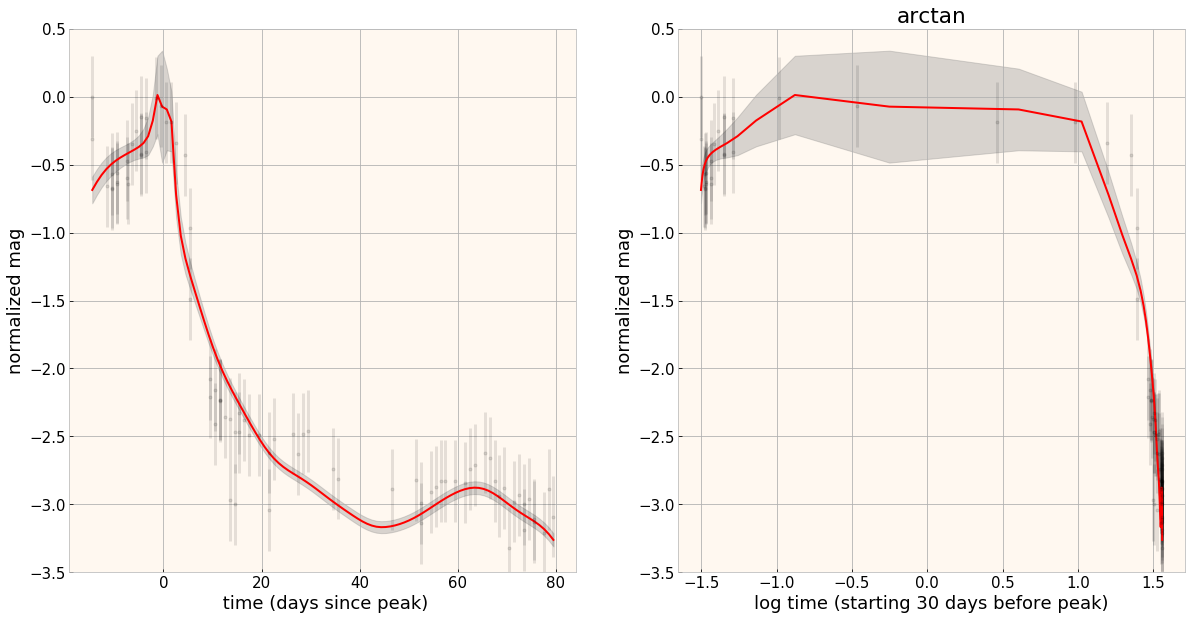

In [29]:
gp.compute(np.arctan(x), yerr * errorbarInflate[sn])
results = op.minimize(nll, p0, jac=grad_nll, args=(y, np.log(t+30), gp))
    #    # Update the kernel and print the final log-likelihood.
gp.kernel[:] = results.x
print ("hyperparameters", gp.kernel)
print ("log likelihood", gp.lnlikelihood(y))


fig = pl.figure(figsize=(20,10))
fig.add_subplot(1,2,1)
mu, cov = gp.predict(y - meansmooth(x), np.arctan(t))
std = np.sqrt(np.diag(cov))
pl.errorbar(x, y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)
            
pl.plot(t, mu + meansmooth(t), 'r', lw=2)
pl.fill_between(t, 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
pl.ylim(-3.5,0.5)
pl.ylabel("normalized mag")
xl = pl.xlabel(" time (days since peak)")

fig.add_subplot(1,2,2)
gp.compute(np.arctan(x), yerr * errorbarInflate[sn])
mu, cov = gp.predict(y - meansmooth(x), np.arctan(t))
std = np.sqrt(np.diag(cov))
pl.errorbar(np.arctan(x), y, yerr=yerr * errorbarInflate[sn], fmt='k.', alpha=0.1)
            
pl.title("arctan")
pl.plot(np.arctan(t), mu + meansmooth(t), 'r', lw=2)
pl.fill_between(np.arctan(t), 
                mu + meansmooth(t) - std, 
                mu + meansmooth(t) + std , color='grey', alpha=0.3)
pl.ylim(-3.5,0.5)
pl.ylabel("normalized mag")
xl = pl.xlabel("log time (starting 30 days before peak)")
